In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Kokie parametrai leis sukurti ir išleisti gerai įvertinta  žaidimą
i koki zanra verta investuoti

In [200]:
df_games = pd.read_csv("data/metacritic_games.csv")
df_games.tail()

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
20417,ARK: Survival Evolved,Switch,Studio Wildcard,Studio Wildcard,Action Adventure,Online Multiplayer,T,NaN,"Nov 30, 2018",/game/switch/ark-survival-evolved,0,1,11,29,4,0,5,2.4
20418,Wild West Online,PC,NaN,NaN,Role-Playing,Online Multiplayer,NaN,NaN,"May 10, 2018",/game/pc/wild-west-online,0,0,8,29,0,0,9,0.4
20419,The Quiet Man,PS4,"Square Enix, Human Head Studios",Square Enix,Action Adventure,No Online Multiplayer,M,NaN,"Nov 1, 2018",/game/playstation-4/the-quiet-man,1,0,20,28,5,0,19,2.1
20420,Awkward,Switch,Snap Finger Click Ltd,Snap Finger Click Ltd,Miscellaneous,No Online Multiplayer,M,NaN,"Jul 5, 2018",/game/switch/awkward,0,0,4,28,0,0,2,tbd
20421,Tennis,Switch,D3Publisher,D3Publisher,Sports,No Online Multiplayer,E,NaN,"Jan 25, 2018",/game/switch/tennis,0,0,4,28,1,0,0,4.0


*sukuriame žanrų sąrašą

In [201]:
df_games = df_games.rename(columns={"genre(s)": "genres"})
genre_list = df_games.genres
genre_list = set(genre_list)
print(genre_list)

{'Adventure', '4X', 'Ice Hockey', 'Horror', 'Party', 'General', '2D', 'Olympic Sports', "Beat-'Em-Up", 'Western-Style', 'Sci-Fi', 'Fantasy', 'Alternative', 'Action RPG', 'Breeding/Constructing', 'Strategy', 'Formula One', 'Driving', 'Virtual Life', 'Massively Multiplayer Online', 'Traditional', 'Other', 'Rally / Offroad', 'Tycoon', 'Console-style RPG', 'Flight', 'Turn-Based', 'Role-Playing', 'Modern', 'Action', 'Wargame', 'Action Adventure', 'GT / Street', 'Third-Person', 'Puzzle', 'Sports', 'Pinball', 'Music Maker', 'Fighting', 'First-Person', 'Board Games', 'Music', 'Shooter', '3D', 'WWI', 'Real-Time', 'Card Battle', 'Futuristic', 'Platformer', 'Dancing', 'City Building', 'Rail', 'PC-style RPG', 'Miscellaneous', 'Sim', 'Simulation', 'Compilation', 'WWII', 'Edutainment', 'Tactical', 'Japanese-Style', 'Military', 'Scrolling', 'Arcade', 'MOBA', 'Historic', 'Racing', 'Street'}


In [203]:
df_games = df_games.dropna(subset=['genres'])

In [219]:
x = df_games.groupby('genres').genres.count()
x.sort_values(ascending=False)

genres
Action              7113
Action Adventure    2268
Sports              1847
Role-Playing        1790
Strategy            1654
                    ... 
Edutainment            1
Wargame                1
MOBA                   1
Flight                 1
Western-Style          1
Name: genres, Length: 68, dtype: int64

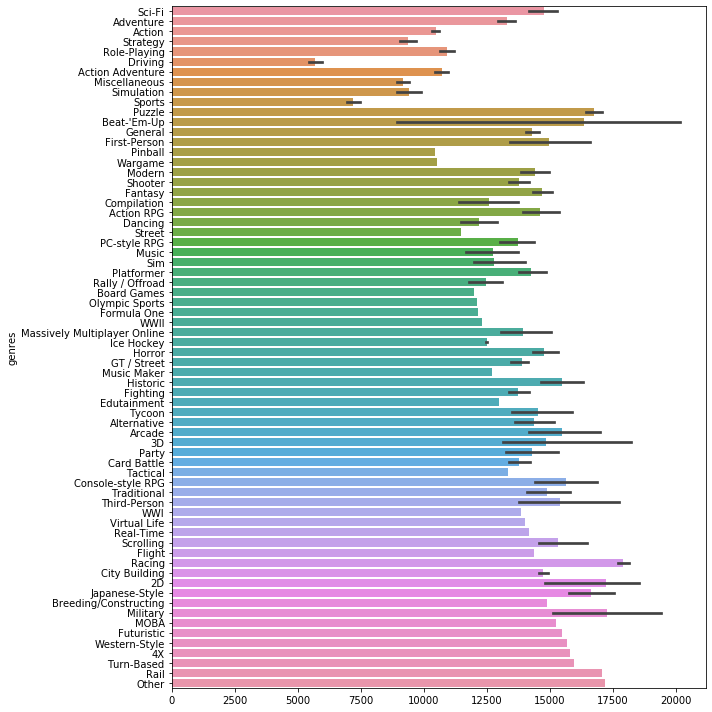

In [210]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_games.index, y=df_games['genres'])
plt.tight_layout()